In [10]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

import os

In [13]:


order = np.arange(1, 10)

accs_list_big = []
loss_list_big = []



names_list_accs = []


for i in order:
    for filename in os.listdir():
        if filename.endswith(".npy"):
            
            if "acc" in filename:
                
                filename_1 = filename.split("-")
                wrong, correct = filename_1[0].split("_")
                
                
                if i == int(correct):
                    names_list_accs.append(int(correct))
                    a = np.load(filename)
                    accs_list_big.append(a)
                    
            if "loss" in filename:
                
                try:
                
                    filename_1 = filename.split("-")
                    wrong, correct = filename_1[0].split("_")


                    if i == int(correct):

                        a = np.load(filename)
                        loss_list_big.append(a)

                except:
                    continue



In [14]:
accs_list_big = np.array(accs_list_big)
loss_list_big = np.array(loss_list_big)
loss_list_big = loss_list_big.reshape((9, 21, 40))


np.save("loss_2Dim_big.npy", loss_list_big)


names = np.unique(names_list_accs, return_counts=True)


(189, 40)
(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([21, 21, 21, 21, 21, 21, 21, 21, 21]))


In [15]:
accs_list_big = accs_list_big.reshape((9, 21, 40))

accs_max = np.max(accs_list_big, axis=2)

mean_accs = np.mean(accs_max, axis=1)

std_accs = np.std(accs_max, axis=1)

print(np.round(mean_accs, 3)*100)
print(np.round(std_accs, 3)*100)

[60.7 77.2 85.5 82.8 87.9 90.9 91.2 91.9 93.5]
[4.9 2.8 2.9 4.4 3.1 2.1 2.3 3.9 2.7]


In [16]:
accs_list_flat = accs_list_big.flatten()
loss_list_flat = loss_list_big.flatten()

Text(0, 0.5, 'Accuracy')

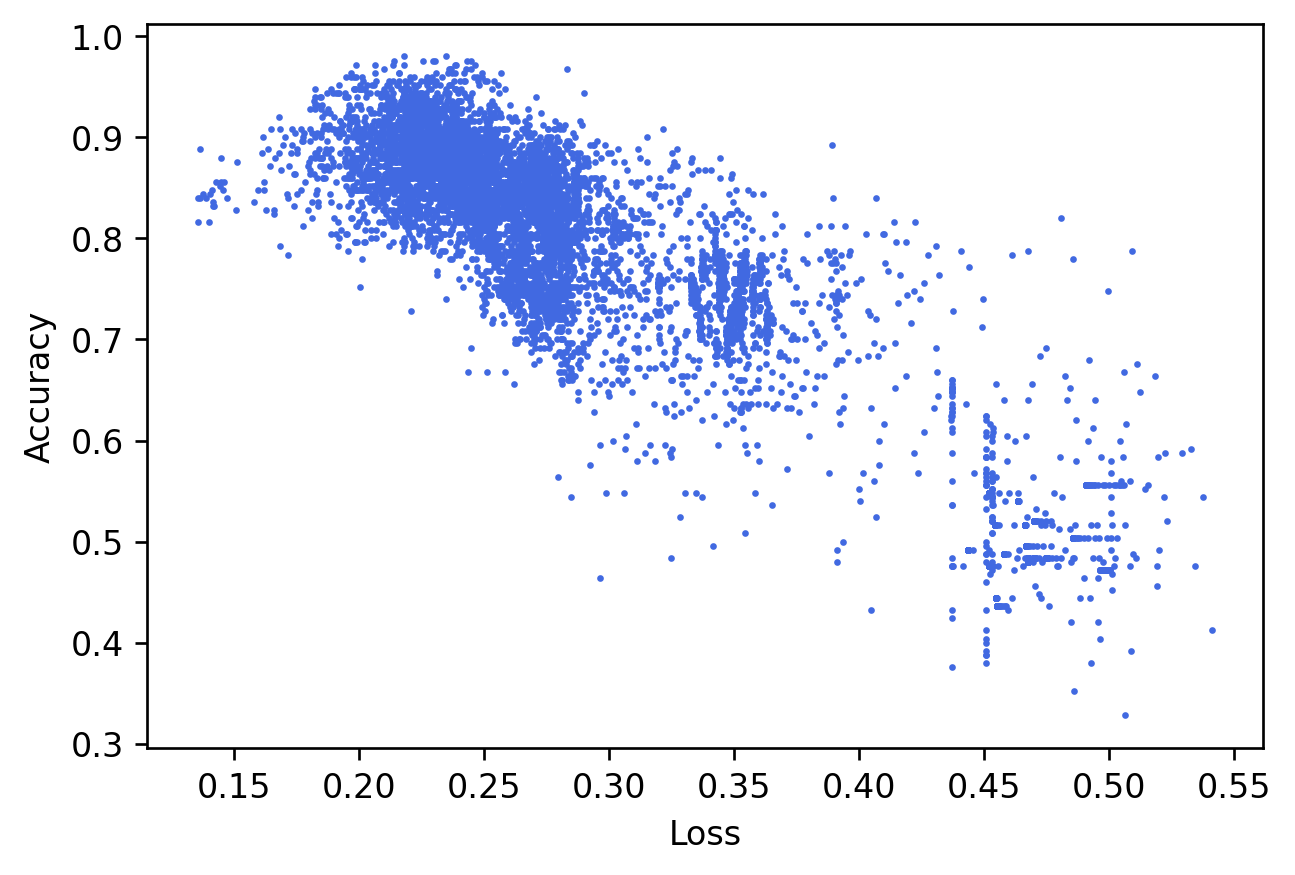

In [17]:
plt.figure(dpi=120)
plt.scatter(loss_list_flat, accs_list_flat, s=1, color="royalblue")
plt.xlabel("Loss")
plt.ylabel("Accuracy")

In [18]:
np.save("accs_list_big_2Dim.npy", accs_list_big)

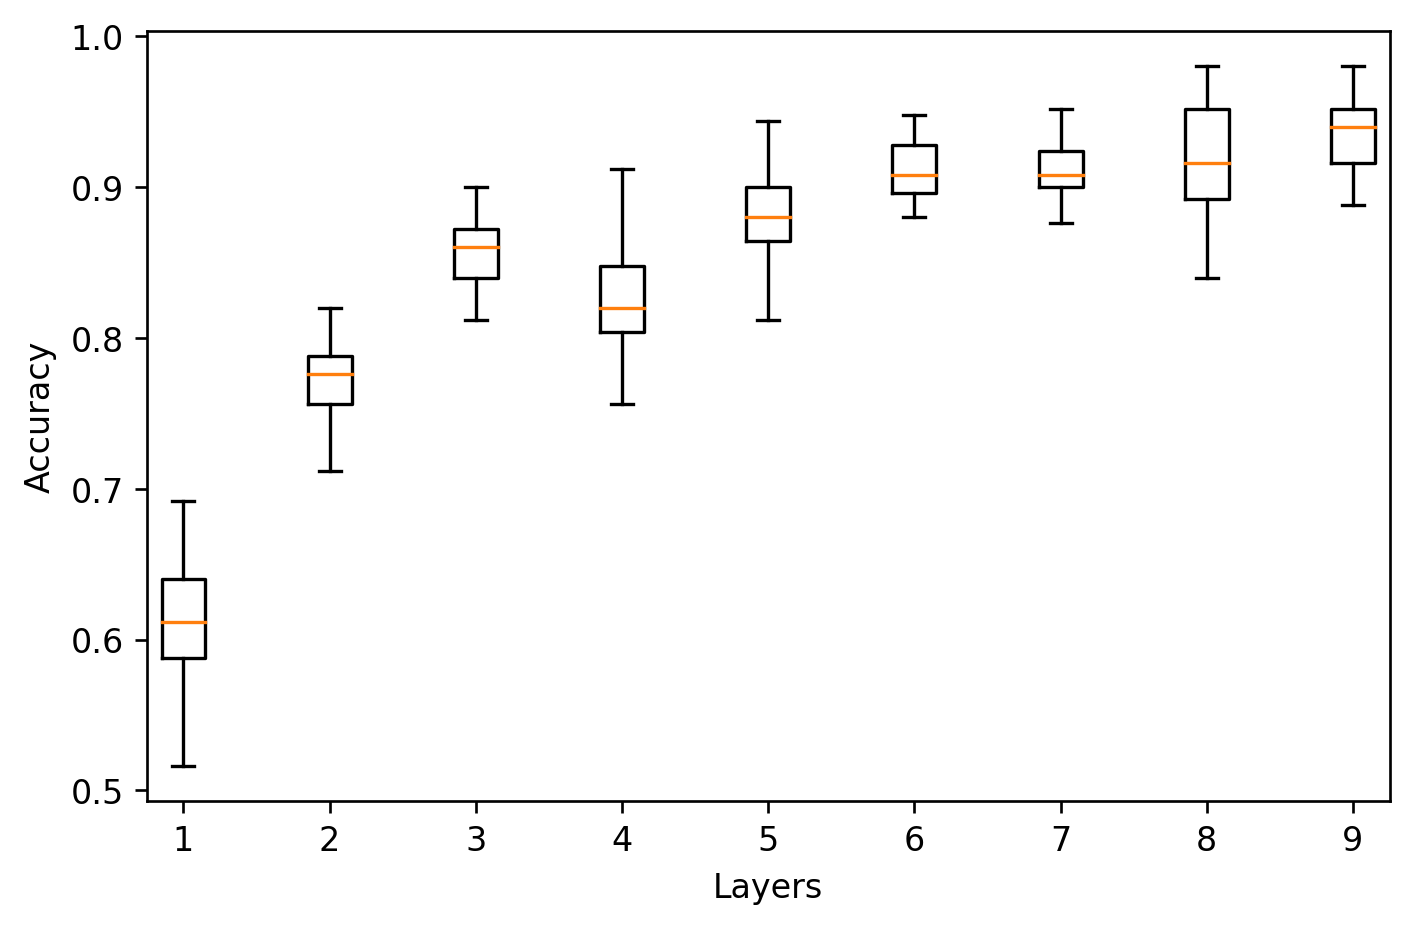

In [20]:
data_a = list(accs_max)
data_b = list(accs_max)

ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure(dpi=120)

bpl = plt.boxplot(data_a, positions=np.arange((len(data_a)))*2, sym='', widths=0.6)
#bpr = plt.boxplot(data_b, positions=np.arange((len(data_b)))*2.0+0.4, sym='', widths=0.6)
#set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
#set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
#plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c="black")
#plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlabel("Layers")
plt.ylabel("Accuracy")
#plt.xlim(-2, len(ticks)*2)
#plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('Boxplot_2Dim.pdf')

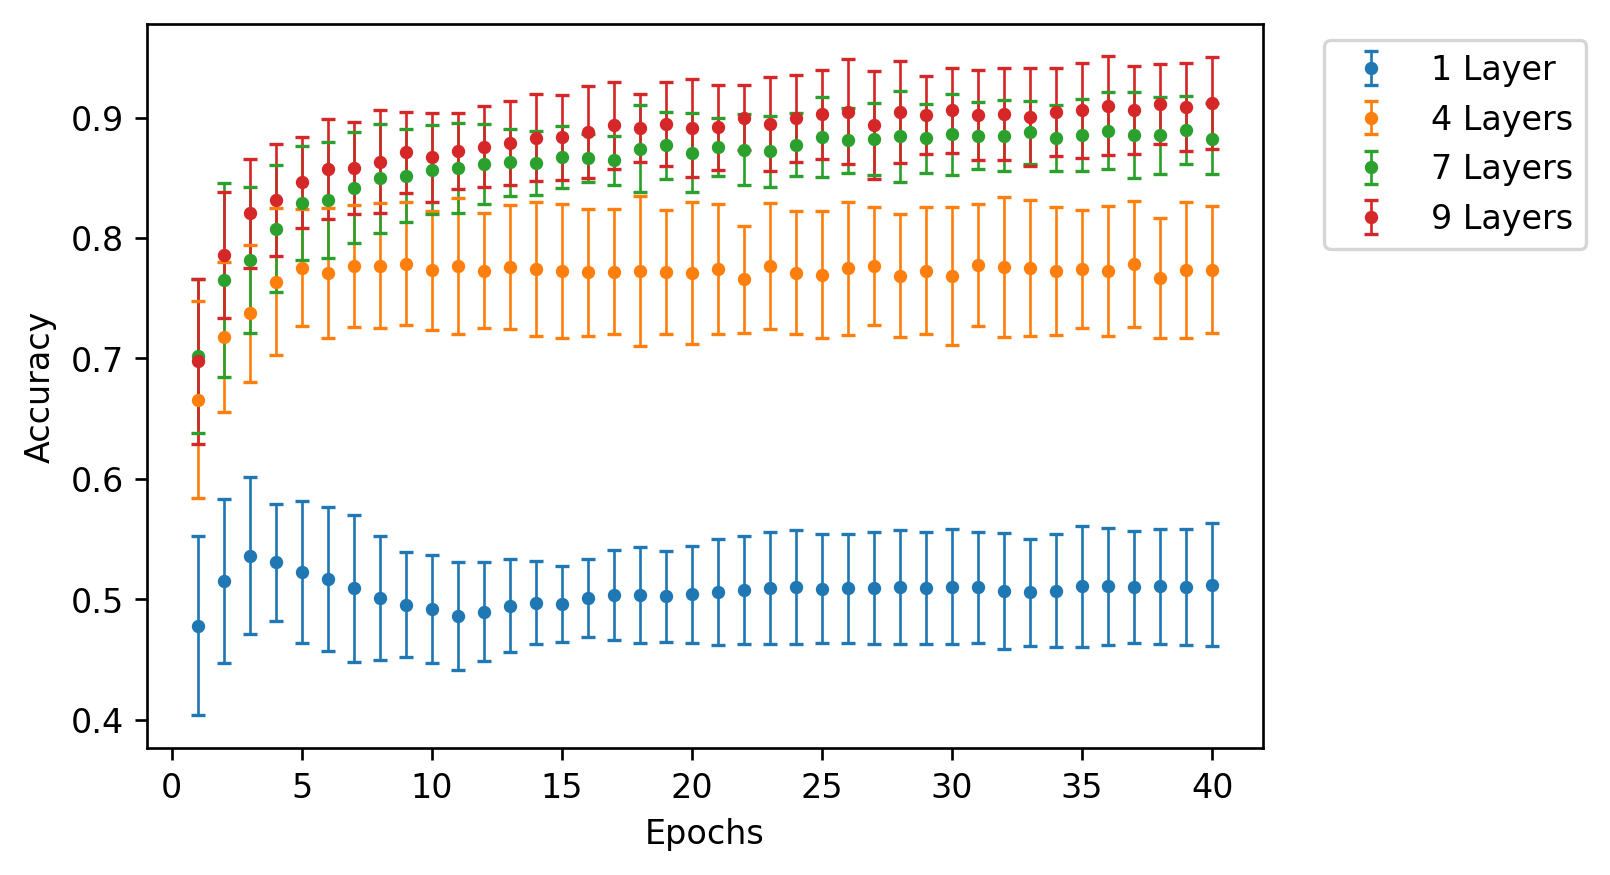

In [25]:
models = [0, 3, 6, 8]

plt.figure(dpi=120)

for j in models:
    if j == 0:
        plt.errorbar(epochs_x, mean_accs_per_epoch[j], yerr=std_accs_per_epoch[j], fmt='.', elinewidth=0.8,capsize=2, label=f"{j+1} Layer")
    else:
        plt.errorbar(epochs_x, mean_accs_per_epoch[j], yerr=std_accs_per_epoch[j], fmt='.', elinewidth=0.8,capsize=2, label=f"{j+1} Layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1.04, 1))

plt.savefig("Bin_Circle_Acc.pdf", bbox_inches='tight')


In [26]:

np.save("Acc_Circle_2Dim.npy", np.array(mean_accs))
np.save("Var_Acc_Circle_2Dim.npy", np.array(std_accs))

In [1]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)



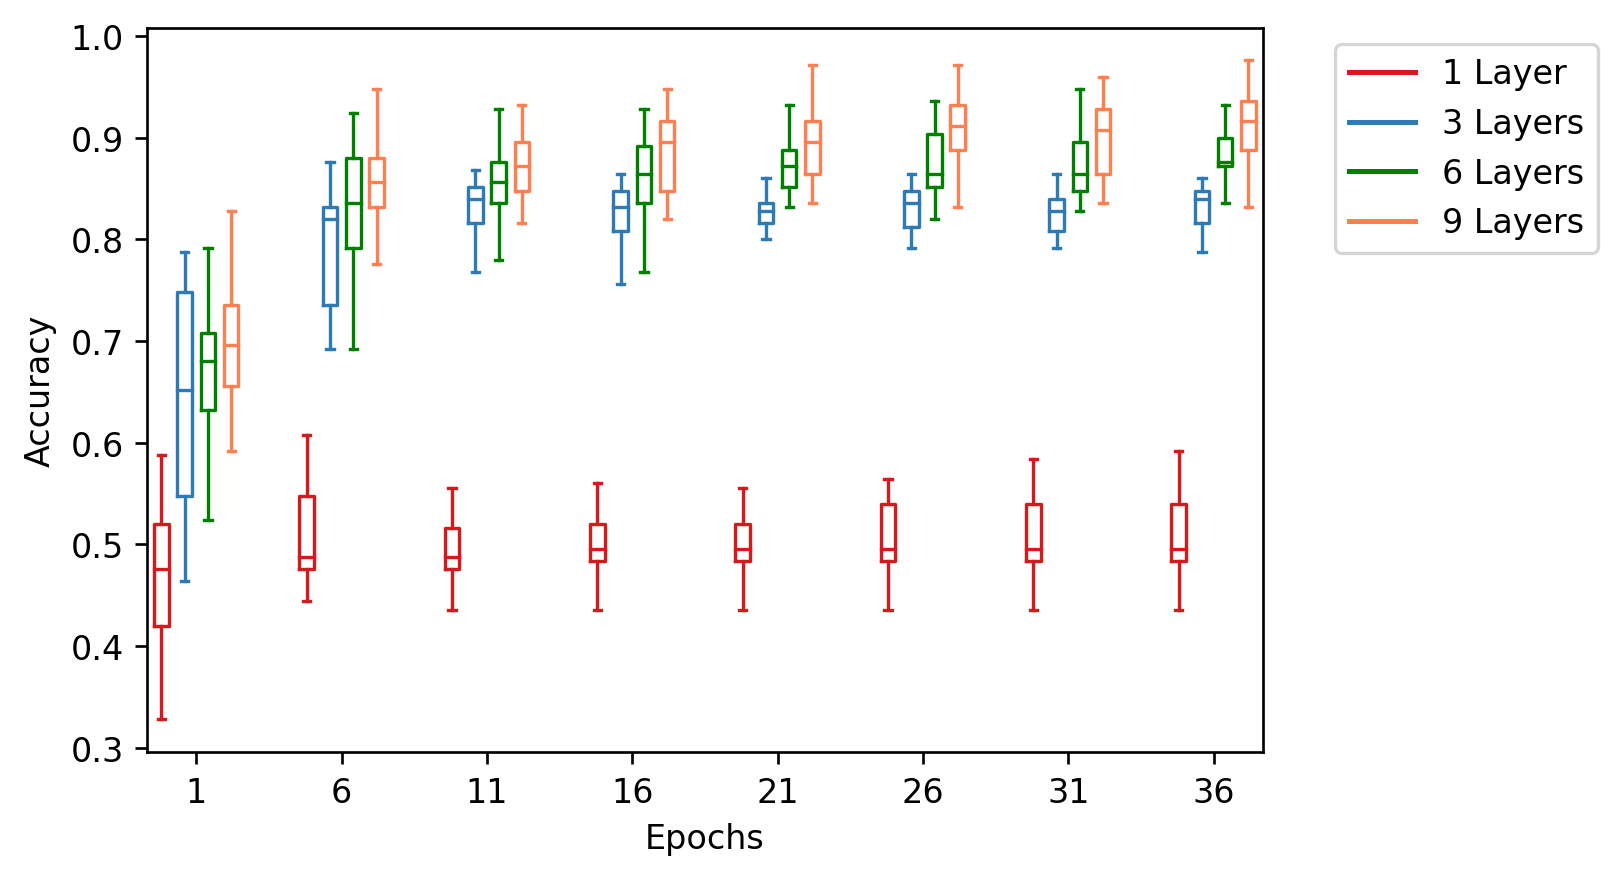

In [33]:

x = np.arange(1, 41, 5)
ticks = x
data1 = accs_list_big[0, :, ::5]
data2 = accs_list_big[2, :, ::5]
data3 = accs_list_big[5, :, ::5]
data4 = accs_list_big[-1, :, ::5]
plt.figure(dpi=120)
a = plt.boxplot(data1, positions=x*1-1.2, showfliers=False)
b = plt.boxplot(data2, positions=x*1-.4, showfliers=False)
c = plt.boxplot(data3, positions=x*1+.4, showfliers=False)
d = plt.boxplot(data4, positions=x*1+1.2, showfliers=False)

plt.plot([], c='#D7191C', label="1 Layer")
plt.plot([], c='#2C7BB6', label="3 Layers")
plt.plot([], c='green', label="6 Layers")
plt.plot([], c='coral', label="9 Layers")

set_box_color(a, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(b, '#2C7BB6')
set_box_color(c, 'green')
set_box_color(d, 'coral')

plt.legend(bbox_to_anchor=(1.05, 1))

plt.xlabel("Epochs")
plt.ylabel("Accuracy")


plt.xticks(x*1, ticks)
plt.savefig("Boxplot_layer_comp.pdf", bbox_inches='tight')